# Init

In [2]:
from pathlib import Path
import os
import numpy as np
from matplotlib import pyplot as plt
import six.moves.urllib as urllib
from PIL import Image


import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_utils
from object_detection.utils import config_util
from object_detection.builders import model_builder

# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

from keras.preprocessing.image import load_img,img_to_array,array_to_img
from IPython.display import display


2021-08-13 20:36:52.569143: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# TensorFlow Object Detection API

In [3]:
display(tf.__version__,tf.config.list_physical_devices('GPU'))
# Check available GPU devices.
display("The following GPU devices are available: %s" % tf.test.gpu_device_name())


2021-08-13 20:36:59.222191: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-13 20:36:59.293795: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-13 20:36:59.294999: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce MX150 computeCapability: 6.1
coreClock: 1.0375GHz coreCount: 3 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 37.33GiB/s
2021-08-13 20:36:59.295177: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-13 20:36:59.311973: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-08-13 20:36:59.312251: I tensorflow/stream_executor/platfor

'2.5.0'

atform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2021-08-13 20:36:59.321304: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcurand.so.10
2021-08-13 20:36:59.323869: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcusolver.so.11
2021-08-13 20:36:59.328124: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcusparse.so.11
2021-08-13 20:36:59.328893: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-08-13 20:36:59.329293: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-13 20:36:59.330652: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

 SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-13 20:36:59.331655: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2021-08-13 20:36:59.372530: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-13 20:36:59.375598: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-13 20:36:59.377107: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce MX150 computeCapability: 6.1
coreClock: 1.0375GHz coreCount

'The following GPU devices are available: /device:GPU:0'

In [ ]:

MODELS_DIR = '<PATH-TO-MODEL-ROOT-DIR>/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'

PATH_TO_CKPT = os.path.join(MODELS_DIR, 'checkpoint/')
PATH_TO_CFG = os.path.join(MODELS_DIR, 'pipeline.config')

LABEL_FILENAME = 'labelmap.pbtxt'
PATH_TO_LABELS = os.path.join(MODELS_DIR, LABEL_FILENAME)
SAVED_MODEL_DIR=os.path.join(MODELS_DIR,'saved_model')


In [6]:
# LOAD LABELMAP PROTO into Dict
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

#Uncomment below to display 
# category_index

In [7]:
# LOAD PIPELIINE.CONFIG PROTO as Dict
configs = config_util.get_configs_from_pipeline_file(PATH_TO_CFG)

#Uncomment below to display 
# configs

In [8]:
# DISPLAY MODEL CONFIG 
model_config = configs['model']

#Uncomment below to display 
# model_config

## LOAD IMAGE

PIL.JpegImagePlugin.JpegImageFile

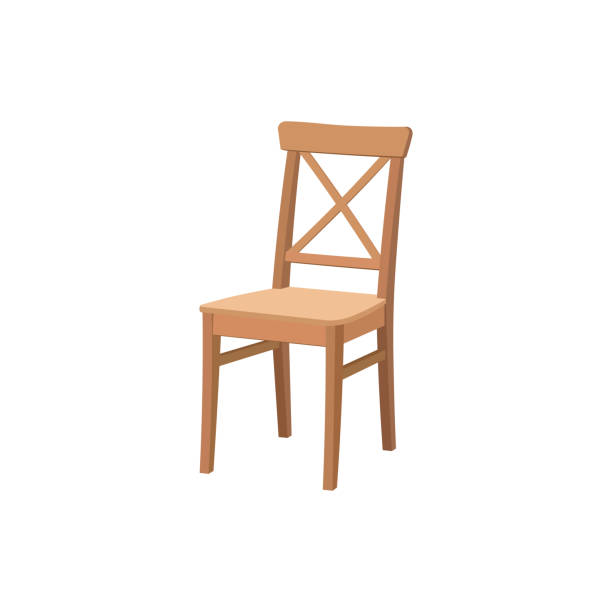

In [9]:
#LOAD IMAGE
IMAGE_PATH='<PATH TO TEST IMAGE>'

image=load_img(IMAGE_PATH)
display(type(image),image)


## METHOD ONE TO LOAD MODEL

In [10]:
def load_model(model_path):
    model = tf.saved_model.load(model_path)
    return model

In [11]:
detection_model=load_model(SAVED_MODEL_DIR)

2021-08-13 20:37:28.205891: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-13 20:37:28.206616: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce MX150 computeCapability: 6.1
coreClock: 1.0375GHz coreCount: 3 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 37.33GiB/s
2021-08-13 20:37:28.206819: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-13 20:37:28.207715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-13 20:37:28.208365: I tensorflow/core/common_ru

In [12]:
display(detection_model)
detection_model.signatures['serving_default']

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7f8f217b97f0>

<ConcreteFunction signature_wrapper(input_tensor) at 0x7F8F7A0F6E50>

### INFERENCE METHOD ONE: EAGER EXECUTION

In [28]:
def run_inference_for_single_image(model, image,uint8:bool=False):
    image_np = np.asarray(image)
    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    dtype=tf.uint8 if uint8 else tf.float32
    input_tensor = tf.convert_to_tensor(image_np,dtype=dtype)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # Run inference
    output_dict = model(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(output_dict.pop('num_detections'))
    output_dict = {key: value[0, :num_detections].numpy()
                   for key, value in output_dict.items()}
    output_dict['num_detections'] = num_detections

    # detection_classes should be ints.
    output_dict['detection_classes'] = output_dict['detection_classes'].astype(
        np.int64)

    # Handle models with masks:
    if 'detection_masks' in output_dict:
        # Reframe the the bbox mask to the image size.
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            output_dict['detection_masks'], output_dict['detection_boxes'],
            image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            detection_masks_reframed > 0.5, tf.uint8)
        output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()

    return output_dict

In [33]:
detections=run_inference_for_single_image(detection_model,image,uint8=True) #PIL IMAGE OBJECT

## METHOD TWO TO LOAD MODEL

In [40]:
# INSTANTIATE MODEL -> DETECTOR
detection_model = model_builder.build(
        model_config=model_config, is_training=False)
detection_model


In [41]:
#RESTORE TRAINING CHECKPOINT
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(PATH_TO_CKPT, 'ckpt-0')).expect_partial()
ckpt

### INFERENCE METHOD TWO: `tf.function` callable graph (non-eager)

In [42]:
# OD FUNCTION TO TF GRAPH (NON EAGER)
@tf.function
def detect_fn(image):
    """Detect objects in image."""

    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

In [43]:
#STORE IMAGE VALUES INTO NUMPY ARRAY OF DIM (W,H,C)
def load_tensor(image:Image.Image):
    image_np=img_to_array(image)
    display(image_np.shape)
    
    #GENERATE TENSOR FROM IMAGE OBJECT
    input_tensor = tf.convert_to_tensor(
        image_np, dtype=tf.float32)
    type(input_tensor)

    #EXPAND DIM TO 4 -> ADD BATCH ENTITY
    input_tensor = input_tensor[tf.newaxis, ...]
    display(type(input_tensor),input_tensor.shape)
    return input_tensor

input_tensor=load_tensor(image)

(612, 612, 3)

tensorflow.python.framework.ops.EagerTensor

TensorShape([1, 612, 612, 3])

In [75]:
#INPUT IMAGE INTO DETECTOR (WILL TAKE A WHILE)
detections, predictions_dict, shapes = detect_fn(input_tensor)


In [76]:

# OFFSET FOR LABELMAP INDEX 0 FOR BG
label_id_offset = 1
detections['detection_boxes']=detections['detection_boxes'][0].numpy()
detections['detection_classes'] =(detections['detection_classes']
             [0].numpy() + label_id_offset).astype(int)
detections['detection_scores']=detections['detection_scores'][0].numpy()

if 'detection_masks' in detections:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
        detections['detection_masks'], detections['detection_boxes'],
        image.shape[0], image.shape[1])
    detection_masks_reframed = tf.cast(
        detection_masks_reframed > 0.5, tf.uint8)
    detections['detection_masks_reframed'] = detection_masks_reframed.numpy()

## RESULTS

In [77]:
# OD DETECTION RESULTS DICT
# detections
for key in detections.keys():
    print(key)

detection_boxes
detection_scores
detection_classes
num_detections
raw_detection_boxes
raw_detection_scores
detection_multiclass_scores
detection_anchor_indices


In [78]:
(detections['detection_boxes'])

<tf.Tensor: shape=(100, 4), dtype=float32, numpy=
array([[0.20025966, 0.31731784, 0.7936951 , 0.6737599 ],
       [0.1845122 , 0.30794877, 0.8068476 , 0.66006315],
       [0.20549175, 0.30952734, 0.79458845, 0.66145027],
       [0.18392646, 0.31551605, 0.7878134 , 0.67036575],
       [0.4269815 , 0.32094365, 0.79986185, 0.6134036 ],
       [0.20549175, 0.30952734, 0.79458845, 0.66145027],
       [0.31286442, 0.32684588, 0.72922385, 0.729939  ],
       [0.7730615 , 0.2054317 , 1.        , 0.32579327],
       [0.20522922, 0.17285046, 0.73592913, 0.7072637 ],
       [0.19200963, 0.31186944, 0.7972226 , 0.67894804],
       [0.1756531 , 0.4323585 , 0.7186791 , 0.67275274],
       [0.20025966, 0.31731784, 0.7936951 , 0.6737599 ],
       [0.41394776, 0.31835464, 0.7844271 , 0.6445694 ],
       [0.14567277, 0.33623156, 0.8699013 , 0.9230993 ],
       [0.10861808, 0.26150167, 0.8519499 , 0.7354168 ],
       [0.12425518, 0.3237632 , 0.63202626, 0.60780257],
       [0.1933417 , 0.06977561, 0.7824

In [17]:
# UNCOMMENT TO SHOW RESULTS (BIG)
# for key,value in detections.items():
#     print(key,value)

In [79]:
# COPY IMAGE TO ADD ANNOTATIONS
image_np=np.asarray(image)
image_np_with_detections = image_np.copy()

In [80]:
# ANNOTATE USING OD API VIZ UTILS LIBRARIES
vis_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes'],
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.50,
            agnostic_mode=False)

#CONVERT NUMPY ARRAY VALUES INTO IMAGE OBJECT (PILLOW)
image_with_detections=array_to_img(image_np_with_detections)



AttributeError: 
        'EagerTensor' object has no attribute 'tolist'.
        If you are looking for numpy-related methods, please run the following:
        import tensorflow.python.ops.numpy_ops.np_config
        np_config.enable_numpy_behavior()

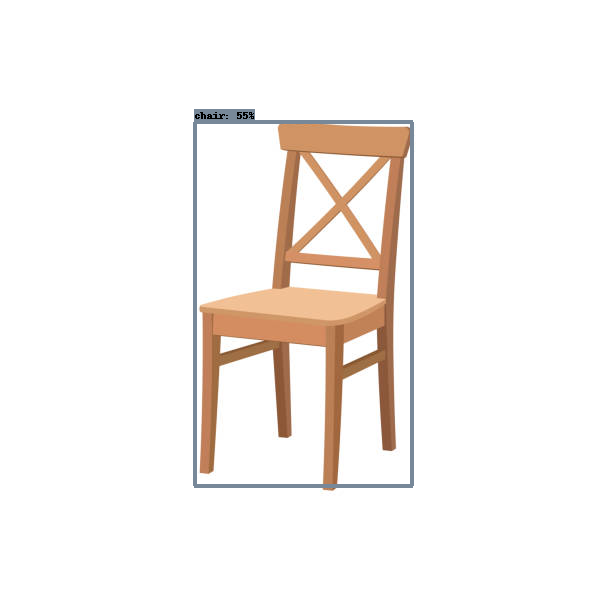

In [39]:
#DISPLAY IMAGE WITH ANNOTATIONS
image_with_detections